<h1>MILAN_AIRBNB DATASET EDA</h1>

<h6>Este cuaderno es un ejemplo de análisis exploratorio de datos (EDA por sus siglas en inglés) ejecutado sobre el dataset MILAN_AIRBNB donde se recogen datos de las viviendas en alquiler de la ciudad Milán a través de la plataforma AIRBNB.

El ejercicio consiste en plotear gráficas interesantes buscando patrones relevantes que pudieran ser útiles en la predicción de alquileres de viviendas con fines vacacionales.</h6>

In [ ]:
#LÍNEA DE IMPORTACIÓN DE LIBRERÍAS

In [ ]:
# Librerías estándar de análisis de datos
import numpy as np
import pandas as pd
import pylab 
import scipy.stats as stats

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

<h2>Exploración básica del dataset</h2>

Estas son las variables por entrada que contiene este dataset:

<ul>
    <li><b>id = </b>Identificación de la vivienda </li>
    <li><b>name = </b>Nombre de la vivienda y descripción </li>
     <li><b>host_id = </b>id del anfitrión </li>
      <li><b>host_name = </b>Nombre del anfitrión </li>
    <li><b>neighbourhood = </b>Nombre del barrio </li>
    <li><b>latitude = </b>Coordenada de latitud de la vivienda </li>
     <li><b>longitude = </b>Coordenada de longitud de la vivienda </li>
     <li><b>room_type = </b>Tipo de vivienda </li>
     <li><b>price = </b>Precio por noche de la vivienda </li>
     <li><b>minimum_nights = </b>Estancia mínima del alojamiento </li>
    <li><b>number_of_reviews = </b>Número de reseñas </li>
     <li><b>last_of_reviews = </b>Fecha de la última reseña </li>
    <li><b>reviews_per_month = </b>Reseñas por mes</li>
    <li><b>calculated_host_listings_count = </b>Número de viviendas del mismo anfitrión</li>
    <li><b>availability_365 = </b> Días disponibles al año </li>
</ul>

In [125]:
# Ruta del archivo csv almacenada en una variable. Buenas prácticas.
path_data="milan_airbnb.csv"
#Importar DataSet y comprobar que está correcto.
df = pd.read_csv(path_data, index_col= "id")
df.head(10)

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
6400,The Studio Milan,13822,Francesca,TIBALDI,45.44119,9.17813,Private room,100,4,12,19/04/10,0.14,1,358
23986,""" Characteristic Milanese flat""",95941,Jeremy,NAVIGLI,45.44806,9.17373,Entire home/apt,150,1,15,07/09/20,0.21,1,363
28300,nice flat near the park,121663,Marta,SARPI,45.47647,9.17359,Private room,180,1,8,22/04/12,0.11,1,365
32119,Nico & Cynthia's Easy Yellow Suite,138683,Nico&Cinzia,VIALE MONZA,45.52014,9.22300,Entire home/apt,75,2,15,01/07/18,0.23,3,200
32649,Nico&Cinzia's Red Easy Suite!,138683,Nico&Cinzia,VIALE MONZA,45.51874,9.22495,Entire home/apt,71,2,29,23/10/16,0.71,3,308
37256,COZY FULLY FURNISHED PRIVATE STUDIO CITY CENTER,119002,Giancarlo,BUENOS AIRES - VENEZIA,45.46884,9.20777,Private room,55,2,34,13/05/19,0.49,2,0
40470,Giacinto Cosy & clean flat near MM1,174203,Giacinto,VIALE MONZA,45.52023,9.22747,Entire home/apt,75,3,37,24/07/17,0.33,2,350
42732,"Navigli near down town, linked Expo",186608,Francesco,MAGENTA - S. VITTORE,45.45814,9.17654,Entire home/apt,199,2,14,22/04/18,0.20,2,362
46536,Nico & Cinzia's Pink Suite!,138683,Nico&Cinzia,VIALE MONZA,45.52276,9.22478,Entire home/apt,76,2,27,03/07/18,0.23,3,150


In [126]:
#Información del DataSet 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18322 entries, 6400 to 50955051
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            18312 non-null  object 
 1   host_id                         18322 non-null  int64  
 2   host_name                       18198 non-null  object 
 3   neighbourhood                   18322 non-null  object 
 4   latitude                        18322 non-null  float64
 5   longitude                       18322 non-null  float64
 6   room_type                       18322 non-null  object 
 7   price                           18322 non-null  int64  
 8   minimum_nights                  18322 non-null  int64  
 9   number_of_reviews               18322 non-null  int64  
 10  last_review                     13260 non-null  object 
 11  reviews_per_month               13260 non-null  float64
 12  calculated_host_listings_c

<h5>Faltan datos en nombre de vivienda y nombre anfitrión, no siendo relevantes para el estudio, pero donde más datos faltan es en las columnas de last_review y reviews_per_month, aunque a priori no los consideramos que vayan a influir en el modelo. </h5>

In [127]:
# Verificación de datos faltantes
df.isnull().sum(axis = 0)

name                                10
host_id                              0
host_name                          124
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5062
reviews_per_month                 5062
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<h5>Faltan 10 datos en name, 124 en host_name y, lo mas importante, faltan 5062 en las columnas last_reviews y reviews_per_month.</h5>

In [128]:
# Análisis estadístico básico
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.832200e+04,18322.000000,18322.000000,18322.000000,18322.000000,18322.000000,13260.000000,18322.000000,18322.000000
mean,8.494918e+07,45.471318,9.187382,115.094913,5.798112,23.720827,0.799344,14.421897,153.508624
std,1.040579e+08,0.020731,0.029543,290.793019,26.687720,57.657486,1.220346,46.295635,138.757302
min,1.944000e+03,45.395050,9.060680,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.243642e+07,45.454462,9.168782,50.000000,1.000000,0.000000,0.100000,1.000000,0.000000
50%,3.141304e+07,45.470875,9.186291,73.500000,2.000000,3.000000,0.310000,1.000000,123.000000
75%,1.335227e+08,45.486850,9.209680,110.000000,3.000000,19.000000,0.990000,4.000000,302.000000
max,4.117208e+08,45.539850,9.275280,11999.000000,1124.000000,896.000000,13.710000,314.000000,365.000000


Una variable puede ser de dos tipos:
* __CATEGÓRICA__: Es una variable que puede tomar un valor de un conjunto de valores limitados, asociados a una cualidad del dato y sin un orden lógico. Éstas a su vez pueden ser:
    - __Binarias__: Pueden tomar uno de los valores. Se suelen denominar clase positiva y clase negativa. Suelen representarse como Verdadero o Falso, y como 0 o 1, pese a lo cual no deben ser confundidas con variables numéricas.
    - __Politómicas__: Pueden tomar más de dos valores.   
* __NUMÉRICA__: Son aquellas que vienen representadas por un número, que dependen de un orden lógico y con las que se pueden hacer operaciones aritméticas. A su vez, pueden ser de dos tipos:
    - __Continuas__: Entre dos valores dados, podemos encontrar infinitos valores.
    - __Discretas__: Cuando entre dos valores dados, no puede tomar valores intermedios.

<h2>Hipotesis</h2>
<ul>
    <li> ¿Influye el barrio en el precio?</li>
    <li> ¿Cuáles son los tipos de alojamientos más alquilados?</li>
    <li> ¿El número de hospedados tiene relación con el tipo de vivienda?</li>
    <li> ¿Cuáles son las fechas de mayor alquiler?</li>
    <li> ¿Las viviendas más caras son las que tienen más reseñas?</li>
</ul>

In [129]:
#Prescindimos de estas 4 columnas, por no considerarlas variables que puedan tener algún impacto en nuestra salida.
df.drop(["name","host_name", "latitude", "longitude"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18322 entries, 6400 to 50955051
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         18322 non-null  int64  
 1   neighbourhood                   18322 non-null  object 
 2   room_type                       18322 non-null  object 
 3   price                           18322 non-null  int64  
 4   minimum_nights                  18322 non-null  int64  
 5   number_of_reviews               18322 non-null  int64  
 6   last_review                     13260 non-null  object 
 7   reviews_per_month               13260 non-null  float64
 8   calculated_host_listings_count  18322 non-null  int64  
 9   availability_365                18322 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 1.5+ MB


In [130]:
# Ahora nuestro dataset se quedaría con estas 10 columnas.
df.head()

,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,
6400,13822,TIBALDI,Private room,100,4,12,19/04/10,0.14,1,358
23986,95941,NAVIGLI,Entire home/apt,150,1,15,07/09/20,0.21,1,363
28300,121663,SARPI,Private room,180,1,8,22/04/12,0.11,1,365
32119,138683,VIALE MONZA,Entire home/apt,75,2,15,01/07/18,0.23,3,200
32649,138683,VIALE MONZA,Entire home/apt,71,2,29,23/10/16,0.71,3,308


In [131]:
# Clasificamos las columnas segun el tipo de variable.
numericas = ["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]
categoricas =["neighbourhood","room_type","last_review"]

In [132]:
# Análisis estadísticos de variables numéricas.
df[numericas].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,18322.000000,18322.000000,18322.000000,13260.000000,18322.000000,18322.000000
mean,115.094913,5.798112,23.720827,0.799344,14.421897,153.508624
std,290.793019,26.687720,57.657486,1.220346,46.295635,138.757302
min,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,0.000000,0.100000,1.000000,0.000000
50%,73.500000,2.000000,3.000000,0.310000,1.000000,123.000000
75%,110.000000,3.000000,19.000000,0.990000,4.000000,302.000000
max,11999.000000,1124.000000,896.000000,13.710000,314.000000,365.000000


In [133]:
# Información cuantitativa de variables categóricas.
for col in categoricas:
    print(f"Column name: {col}")
    print(df[col].value_counts())
    print()

Column name: neighbourhood
BUENOS AIRES - VENEZIA    1373
DUOMO                     1003
NAVIGLI                    875
SARPI                      806
TICINESE                   749
                          ... 
PARCO BOSCO IN CITT         4
PARCO NORD                   3
MUGGIANO                     2
QUINTOSOLE                   1
CASCINA TRIULZA - EXPO       1
Name: neighbourhood, Length: 87, dtype: int64

Column name: room_type
Entire home/apt    13605
Private room        4376
Shared room          267
Hotel room            74
Name: room_type, dtype: int64

Column name: last_review
14/04/19    218
13/04/19    145
12/04/19    144
22/04/18    136
23/02/20    118
           ... 
05/05/16      1
23/10/13      1
29/11/16      1
09/01/19      1
19/04/10      1
Name: last_review, Length: 2039, dtype: int64



<h2> GRÁFICOS RELEVANTES</h2>
    

<h4>BARPLOTS</h4>

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='minimum_nights', ylabel='price'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='price'>,
        <AxesSubplot:xlabel='reviews_per_month', ylabel='price'>,
        <AxesSubplot:xlabel='calculated_host_listings_count', ylabel='price'>,
        <AxesSubplot:xlabel='availability_365', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='minimum_nights'>,
        <AxesSubplot:xlabel='minimum_nights', ylabel='minimum_nights'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='minimum_nights'>,
        <AxesSubplot:xlabel='reviews_per_month', ylabel='minimum_nights'>,
        <AxesSubplot:xlabel='calculated_host_listings_count', ylabel='minimum_nights'>,
        <AxesSubplot:xlabel='availability_365', ylabel='minimum_nights'>],
       [<AxesSubplot:xlabel='price', ylabel='number_of_reviews'>,
        <AxesSubplot:xlabel='minimum_nights', ylabel='number_of_reviews'>,
        <AxesSubp

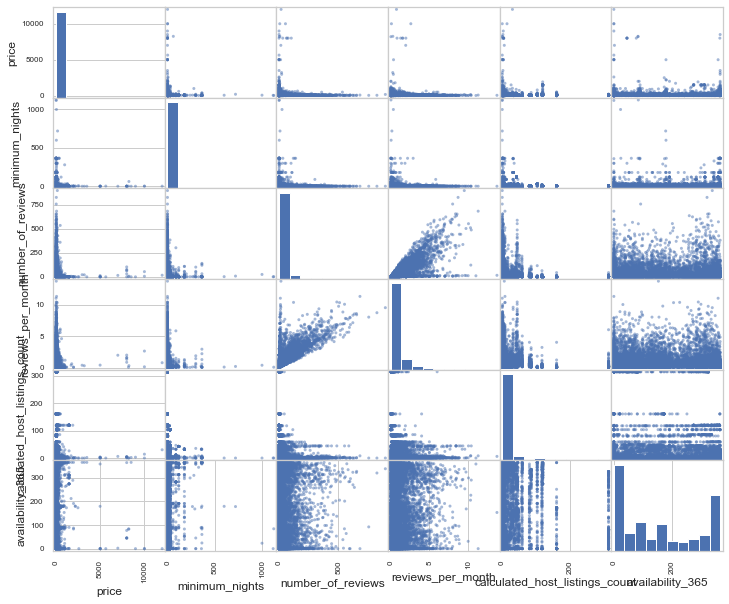

In [134]:
pd.plotting.scatter_matrix(df[numericas], figsize=(12,10))

<h5> Visualización de variables numericas en las cuales se puede apreciar una gran correlación entre last_reviews y reviews_per_month. </h5>

C:\Users\usuario\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


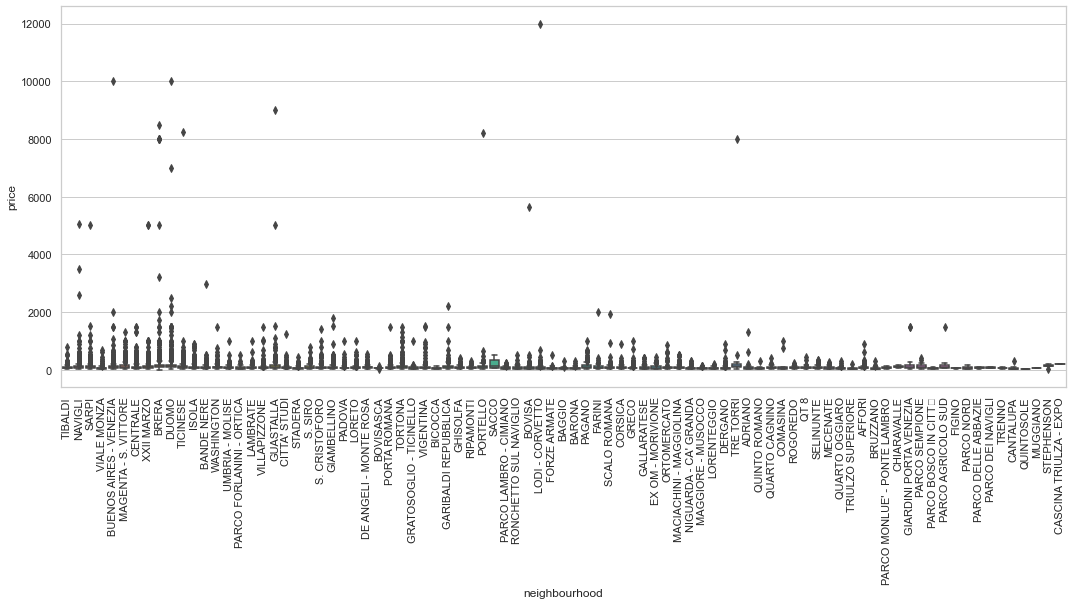

In [135]:
# Gráfico para comparar los precios de los distintos barrios.
fig, ax = plt.subplots(ncols=1, figsize=(18,7))
sns.boxplot(y='price', x='neighbourhood', data=df, ax=ax)
plt.xticks(rotation=90)
plt.show()

C:\Users\usuario\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


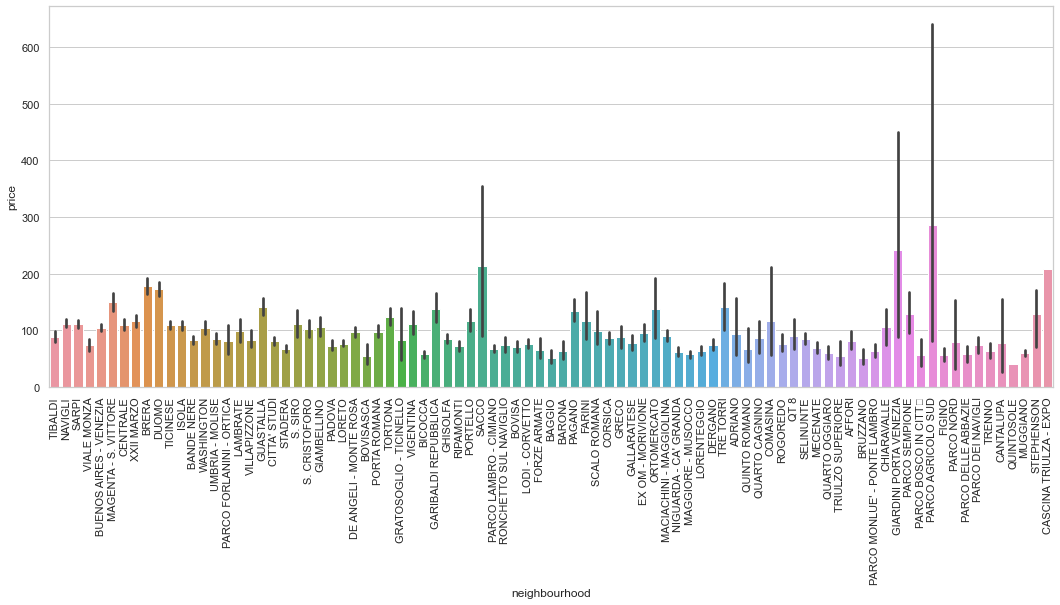

In [136]:
#Gráfico de barras con los mismos datos que en el anterior pero esta vez acotando con precios inferiores a 300 euros.
fig, ax = plt.subplots(ncols=1, figsize=(18,7))
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="neighbourhood", y="price", data=df[(df["price"]<2500)])
plt.xticks(rotation=90)
plt.show()

<h5>Como se puede apreciar en la columna de precios, a partir de 2.500 euros aparecen lo que podrían ser outliers. Más adelante nos encargaríamos de ellos </h5>

<AxesSubplot:xlabel='price', ylabel='Count'>

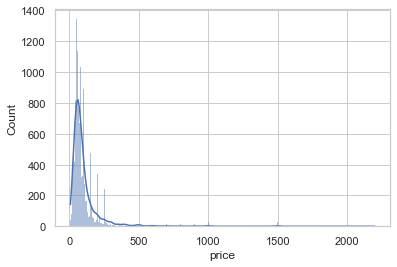

In [137]:
# Partimos de valores menores de 2500 euros porque a partir de ahí estaba plagado 
# de posibles outliers que nos mostraban una gráfica de difícil lectura
sns.histplot(data=df[df["price"]< 2500], x="price", kde=True)

<h5>Con una primera observacion de grafico, la mayor concentracion de precios ocurre entre los valores de 0 y 500. Se profundizara mas adelante en este aspecto</h5>

C:\Users\usuario\miniconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 133 (\x85) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\usuario\miniconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.draw()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]),
 [Text(0, 0, 'TIBALDI'),
  Text(1, 0, 'NAVIGLI'),
  Text(2, 0, 'SARPI'),
  Text(3, 0, 'VIALE MONZA'),
  Text(4, 0, 'BUENOS AIRES - VENEZIA'),
  Text(5, 0, 'MAGENTA - S. VITTORE'),
  Text(6, 0, 'CENTRALE'),
  Text(7, 0, 'XXII MARZO'),
  Text(8, 0, 'BRERA'),
  Text(9, 0, 'DUOMO'),
  Text(10, 0, 'TICINESE'),
  Text(11, 0, 'ISOLA'),
  Text(12, 0, 'BANDE NERE'),
  Text(13, 0, 'WASHINGTON'),
  Text(14, 0, 'UMBRIA - MOLISE'),
  Text(15, 0, 'PARCO FORLANINI - ORTICA'),
  Text(16, 0, 'LAMBRATE'),
  Text(17, 0, 'VILLAPIZZONE'),
  Text(18, 0, 'GUASTALLA'),
  Text(19, 0, "CITTA' STUDI"),
  Text(20, 0, 'STAD

C:\Users\usuario\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


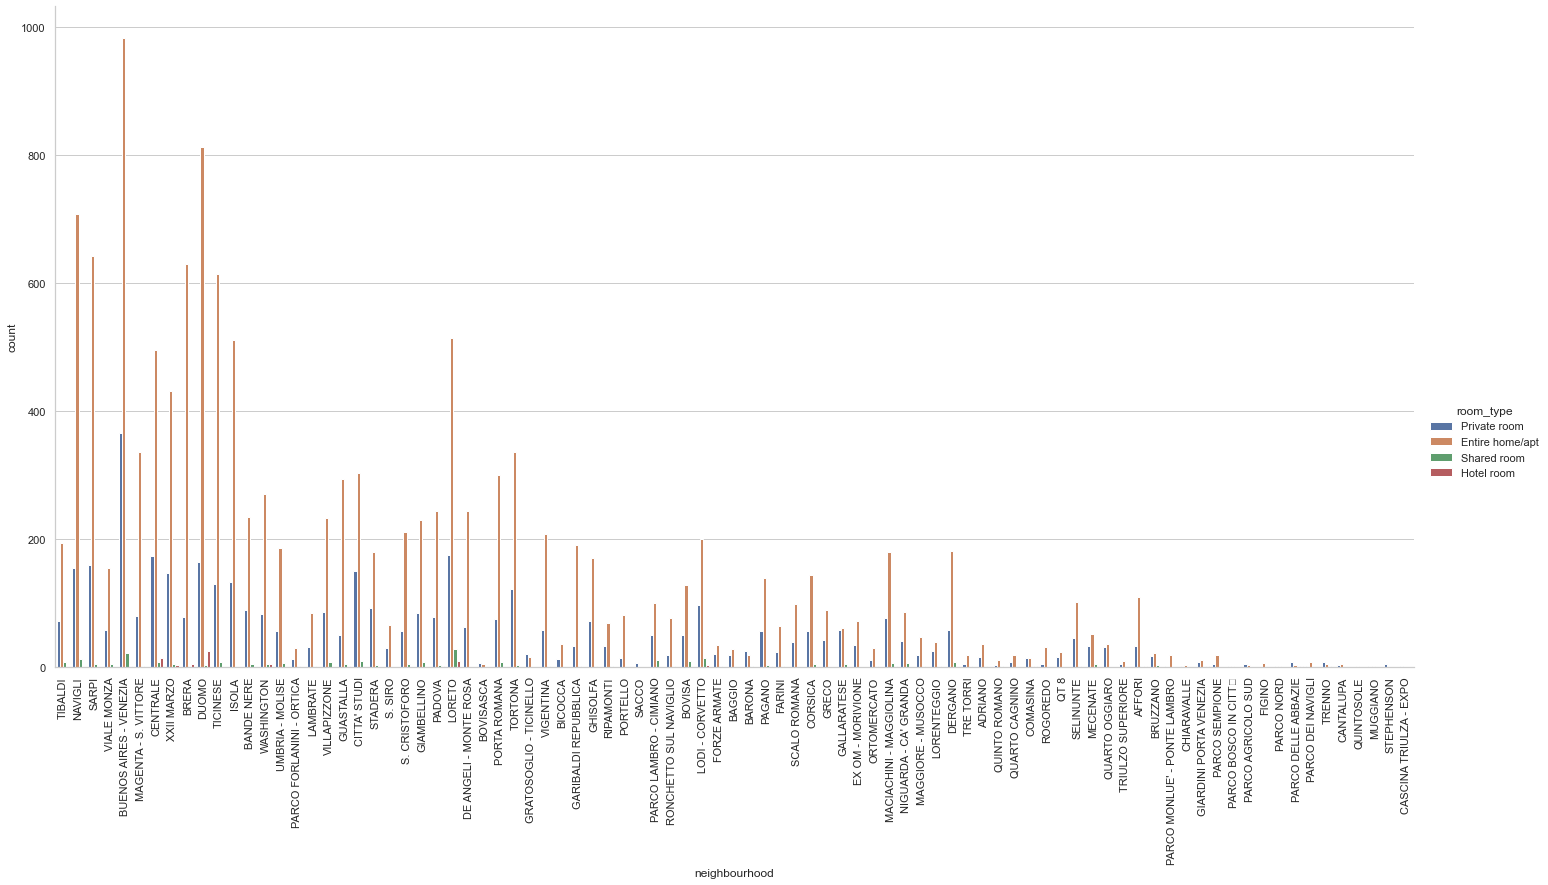

In [138]:
# Comparación de tipos de alojamiento predominantes en los barrios 
sns.catplot(x ="neighbourhood", hue ="room_type", kind ="count", data = df, aspect=2, height=10)
plt.xticks(rotation=90)

<h5>El naranja de Entire home/apt predomina en la gráfica y también se puede ver que los barrios con más alojamientos son: Buenos Aires - Venezia, Duomo y Navigli, "casualmente" en el centro de la ciudad. Los barrios con menos alojamientos se situan a las afueras de la ciudad como por ejemplo en: Cascina Triulza - Expo. El tipo de alojamiento más presente es Entire home/ apt, segundo tipo de alojamiento más habitual es Private room </h5>

In [139]:
# El método .corr() nos muestra una tabla de correlaciones en el dataset para las variables continuas
# La diagonal siempre es 1 porque cada variable correlaciona en 1 consigo misma, evidentemente
corr = df.corr(method = 'kendall')
df.corr(method = 'kendall')

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,-0.030384,-0.071993,-0.090829,0.066422,-0.023793,-0.050155
price,-0.030384,1.000000,-0.024708,-0.143022,-0.140542,0.021713,0.044027
minimum_nights,-0.071993,-0.024708,1.000000,-0.076209,-0.107301,-0.102976,0.022155
number_of_reviews,-0.090829,-0.143022,-0.076209,1.000000,0.670582,-0.048890,0.009927
reviews_per_month,0.066422,-0.140542,-0.107301,0.670582,1.000000,0.109588,0.024594
calculated_host_listings_count,-0.023793,0.021713,-0.102976,-0.048890,0.109588,1.000000,0.105244
availability_365,-0.050155,0.044027,0.022155,0.009927,0.024594,0.105244,1.000000


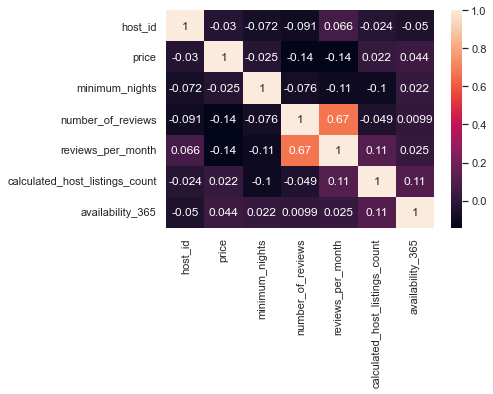

In [140]:
# A partir de la tabla de correlación, obtenemos el mapa de calor 
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
# Ahora igual pero más bonito

# Generamos una máscara para no duplicar lops valores
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Configuramos el matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Ploteamos el heatmap
sns.heatmap(df.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

<h5>Comos se puede apreciar en esta última tabla y estos 2 gráficos, apenas existe correlación entre estas variables salvo entre numbers_of_reviews y reviews_per_month </h5>

<h2>Ingeniería de características<h2/>
    <h3>Imputación de valores perdidos<h3/>

In [141]:
#Verificación de datos perdidos
df.isnull().sum()

host_id                              0
neighbourhood                        0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5062
reviews_per_month                 5062
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [142]:
# Comprobamos el porcentaje de valores perdidos para cada caso
ultimas_reviews_perdidas = df["last_review"].isnull().sum() / len(df["last_review"])
numero_reviews_perdidas = df["reviews_per_month"].isnull().sum() / len(df["reviews_per_month"])

print(f"Porcentaje de valores perdidos en Last_Reviews: {round(ultimas_reviews_perdidas*100, 2)}%")
print(f"Porcentaje de valores perdidos en Numero_de_reviews: {round(numero_reviews_perdidas*100, 2)}%")

Porcentaje de valores perdidos en Last_Reviews: 27.63%
Porcentaje de valores perdidos en Numero_de_reviews: 27.63%


<h5>Se observan un 27,63% de datos perdidos tanto en last_review como en reviews_per_month, valores que sustituiremos por la moda.<h5/>

In [143]:
#Obtención de la moda y sustitución de valores perdidos por la moda
last_review_mode = df["last_review"].mode()[0]
df["last_review"].fillna(last_review_mode, inplace=True) 

In [144]:
reviews_por_noche_mean = df["reviews_per_month"].mean()
df["reviews_per_month"].fillna(reviews_por_noche_mean, inplace=True) 

In [145]:
#Verificación de datos perdidos
df.isnull().sum()

host_id                           0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<h5>Como se ve, ya no hay datos perdidos porque se han sustituido por la moda (last_review) y por la media (reviews_per_month).<h5/>

<h3>Detección de outliers<h3/>

<h5>Un outlier es un valor anómalo. Un valor puede ser anómalo por diversas circunstancias: errores al anotar un dato, malfuncionamiento de un sensor, circunstancias especiales, etc.<h5/>

In [ ]:
#Verificación de viviendas con precio por debajo de 2500
df[(df["price"]< 2500)].value_counts().sum()

<h5>Mayoría aplastante de viviendas con precio inferior a 2.500.</h5>

In [ ]:
#Cantidad de viviendas con precio mayor a 2500
df[(df["price"]>= 2500)].value_counts().sum()


<h5>La gran mayoría de valores del precio están por debajo de 2500 euros. Solo 26 viviendas tienen un precio por encima de 2.500<h5/>

In [ ]:
# Obtener nuevo DataFrame con las entradas cuyo precio es menor a 2500
price_clean = df[(df["price"] < 2500)]

In [ ]:
price_clean.info()

<h5>Tabla con el precio recortado por debajo de 2.500.</h5>

In [ ]:
# Cantidad de datos por rangos para ver que rango de visualizacion escoger
cant_precios = len(df[(df["price"] > 300)]) / len(df["price"])
print(f"Porcentaje de valores perdidos en precios: {round(cant_precios*100, 2)}%")

<h5>Valor residual el que nos queda por encima de 300. </h5>

In [ ]:
#Gráfico de barras acotando con precios inferiores a 300 euros.
fig, ax = plt.subplots(ncols=1, figsize=(18,7))
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="neighbourhood", y="price", data=df[(df["price"]<300)])
plt.xticks(rotation=90)
plt.show()

<h5>Gráfica con el precio por debajo de 300 euros. Se ve que la concentración de los datos se da a partir de unos 65 euros para abajo</h5>

<h4>ANÁLISIS DE LA DISTRIBUCIÓN DE LA VARIABLE PRECIO</h4>

In [ ]:
# Analisis de distribucion normal de precio acotando por debajo de 300.
df["price"].skew()
sns.histplot(data=df[(df["price"]< 300)], x="price", kde=True)

sns.boxplot(x=df[(df["price"]<300)]["price"])

<h5>El resultado deja mucho que desear.</h5>

In [ ]:
# Cuanto más se ajusten los puntos a la línea, más normal es la distribución
price_cleaned = df.drop(df[(df["price"] < 300)].index)
stats.probplot(price_cleaned["price"], dist="norm", plot=pylab)
pylab.show()

<h5>Aquí lo mismo, el gráfico queda muy disperso.</h5>

In [ ]:
# Aplicamos logaritmo en base 10 
log_price = np.log(df["price"])
#Crea columna log_price
df["log_price"] = log_price
sns.histplot(x=log_price, kde=True)
df.info()

<h5>Esto ya es otra cosa, empieza a acercarse a lo que buscamos aunque aún tiene mucha cola.</h5>

In [ ]:
# Ver los valores de log mayores de 8 que se pierden
len(df[(log_price > 7)])

<h5>No es una pérdida importante.</h5>

In [ ]:
#Seguimos observando la evolución gráfica de la variable precio.
sns.boxplot(x=log_price)

In [ ]:
stats.probplot(log_price, plot=pylab)
pylab.show()

<h5>Nos vamos aproximando a un dibujo mucho más equilibrado.</h5>

In [ ]:
# Se eliminan los outliers de la columna log_price (mayores a 7) 
df = df[(df["log_price"] < 7)]
log_price = df["log_price"]
sns.histplot(x=log_price, kde=True)

<h5>Aplicando la transformacion del logaritmo y eliminando los registros con valor de la columna log_price mayores a 7 , nos que da una distribucion mas normal. Ahora hay una columna price y una columna con los valores del logaritmo de price</h5>

<h5>CATEGORIZACIÓN DE ALGUNAS VARIABLES</h5>

In [ ]:
# Se crea nueva columna con los precios categorizados.
bins = [0,300,500,1000,2000,2500]
names = ['0-300','301-500',"501-1000","1001-2000","2001-2500"]
df_cat = df
df_cat["price_cut"] = pd.cut(df["price"], bins, labels = names)
df_cat["price_cut"].value_counts()

<h5>En el rango de 0-300 euros se aglutinan prácticamente todas las entradas.</h5>

In [ ]:
# Se crea nueva columna con los numeros de reseñas categorizados.
bins = [0,50,200,300,400,700,900]
names = ['1-50','51-200','201-300',"301-400","401-700","701-900"]
df_cat["number_of_reviews_cat"] = pd.cut(df["number_of_reviews"], bins, labels = names)
df_cat["number_of_reviews_cat"].value_counts()

<h5>Alojamientos con mayoría de reseñas en la franja de 1-50.</h5>

In [ ]:
# Tabla para visualizar el número de reseñas por rango de precio.
group = df.groupby(['number_of_reviews_cat', 'price_cut'])
data_prices = group.size().unstack()
data_prices

<h5>Se lleva prácticamente todas las reseñas el rango de 0 a 300 euros.</h5>

In [ ]:
#Graficamos esa tabla
sns.displot(x="number_of_reviews_cat" , y="price_cut", data=df_cat, height = 3, aspect = 5)
plt.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

<h5>No se aprecia el número total de reseñas, sí gráficamente en colores, sobre todo en 2. </h5>

In [ ]:
# Volvemos a graficar, más eficientemente, para ver en qué rango de precios hay más número de reseñas.
sns.catplot(data=df, x="number_of_reviews_cat", kind="count", hue="price_cut")

<h5>En esta sí que podemos ver el número de reseñas, que por ejemplo para el rango de 0-300 euros es superior a 10.000. </h5>

In [ ]:
# Contabilizamos las reseñas sin valor
len(df[(df["number_of_reviews"] == 0)])

<h5>Las viviendas que tienen un mayor numero de reseñas son las viviendas con un valor menor a 300 euros (10971) , las cuales tienen una cantidad de reseñas de 1 a 50, aunque hay 5004 viviendas que tienen 0 reseñas. <h5>

In [ ]:
#Visualización de la información para cotejar datos
df.info()

<h5>Corroboramos las 5004 reseñas que faltaban que al sumarlas a los 13240 nos darían los 18244 entradas que hay.<h5>

In [ ]:
# Gráfico para comparar los barrios con la disponibilidad de los alojamientos.
fig, ax = plt.subplots(ncols=1, figsize=(18,7))
sns.boxplot(y='availability_365', x='neighbourhood', data=df, ax=ax)
plt.xticks(rotation=90)
plt.show()

<h5>La mayoría de barrios tienen una disponibilidad casi en su totalidad, salvo algunas excepciones que tienen pocos alojamientos con alta disponibilidad. </h5>

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(18,7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="neighbourhood", y="availability_365", data=df[(df["price"]<300)])
plt.xticks(rotation=90)
plt.show()

<h5>Con el precio acotado a menos de 300 euros, la disponibilidad se ve seriamente afectada. </h5>

In [ ]:
# Observamos los outlyers de las variables numéricas
sns.boxplot(data=price_cleaned)
plt.xticks(rotation=90)
plt.show()

<h5>El precio es el que más desentona como ya habíamos visto más arriba.</h5>

In [ ]:
#Analizamos los outlayer de la variable minimum_nights
sns.boxplot(x=df["minimum_nights"])


In [ ]:
sns.boxplot(x= df[(df["minimum_nights"]< 4 )]["minimum_nights"])


In [ ]:
#Comprobar cuantos valores perdemos si nos quedamos con minimum_night menor a 4
len(df[df["minimum_nights"]>=4])
#Eliminamos datos de minimum_nights mayores a 4
df_noches = df[df["minimum_nights"] < 4 ]
#Smuestra nuevamente el grafico, con los valores eliminados
sns.boxplot(x=df_noches["minimum_nights"])


In [ ]:
sns.histplot(data=df, x="minimum_nights", kde=True )

In [ ]:
# Analizamos graficos de variable number_of_reviews
sns.histplot(data=df, x="number_of_reviews", kde=True )

In [ ]:
sns.boxplot(data = df, x ="number_of_reviews")

In [ ]:
sns.boxplot(x= df[(df["number_of_reviews"]< 25 )]["number_of_reviews"])


In [ ]:
sns.histplot(data= df[(df["availability_365"]< 365 )], x="availability_365", kde=True )

<h5>La mayor cantidad de viviendas tienen disponiblidades entre 0 y 25 dias y de 340 a 365 dias</h5>

In [ ]:
df = df[df["number_of_reviews"] < 50 ]
sns.boxplot(data = df, x ="number_of_reviews")

In [ ]:
# Analizamos graficos de variable number_of_reviews
sns.histplot(data=df[df["reviews_per_month"] < 3 ], x="reviews_per_month", kde=True )


In [ ]:
sns.boxplot(data = df, x ="reviews_per_month")

In [ ]:
corr = df.corr(method = 'pearson')
df.corr(method = 'pearson')

In [ ]:
sns.heatmap(corr, annot=True)
plt.show()

##### Hay correlación negativa baja entre calculated_host_listings_count y minimum_nights, por lo que podemos suponer que los host con mas viviendas piden menos noches de estancia minima. También har una relación positiva baja entre reviews_per_month y host_id, fijandonos en que hay host que se repiten (es decir, tienen muchas viviendas) es posible que las reviews_per_month se concentren en estos host.

In [ ]:
#Visualizamos la cantidad de host_id unicos
len(df.host_id.unique())

In [ ]:
#Visualización del porcentaje de host_id repetidos
id_repetidos = 1 - len(df.host_id.unique()) / len(df["host_id"])

print(f"Porcentaje de id repetidos: {round(id_repetidos*100, 2)}%")

 

In [ ]:
#Visualizamos el número de viviendas únicas
len(df.name.unique())

In [ ]:
viviendas_repetidas = 1 - len(df.name.unique()) / len(df["name"])

print(f"Porcentaje de id repetidos: {round(viviendas_repetidas*100, 2)}%")

##### Más de un tercio de los host_id se repiten. Por otra parte solo un 1.48% de las viviendas se repite, por lo que podemos pensar que los host repetidos tienen varias viviendas en propiedad.

In [ ]:
#Visualizamos los host_name que se repiten
len(df.host_name.unique())

<h5>Hay muchos hostname repetidos, pero esto se debe a que los nombres del Dataset son muy genéricos y no incluyyen apellidos. Por otra parte como se repiten los host_id es normal que se repiten los host_name</h5>

##### Concluimos que el calculated_host_listing_count es el número de alojamientos que tiene un mismo host_id, estos alojamientos pueden ser compartimentos de una misma vivienda, o viviendas separadas.

In [ ]:
df.head()

In [ ]:
#agrupamos por barrios y sumamos los valores de number_of_reviews de cada barrio.
#despues obtenemos un ranking en orden descendente.
ranking_mas_resenas = df.groupby(['neighbourhood'])['number_of_reviews'].agg('sum').sort_values(ascending=False)
df_barrios_review = pd.DataFrame(ranking_mas_resenas)
df_barrios_review


##### Estos son los barrios con mas reviews, no tenemos evidencia, pero podemos suponer que los barrios con más reviews son los más ocupados.

In [ ]:
#Visualizamos un ranking de los barrios con más una media de disponiblidad más alta.
ranking_mas_dispo = df.groupby(['neighbourhood'])['availability_365'].agg('mean').sort_values(ascending=True)
df_barrios_dispo = pd.DataFrame(ranking_mas_dispo)
df_barrios_dispo

In [ ]:
#Unimos los dos últimos DataFrame que hemos hecho
df_dispo_review = pd.merge(df_barrios_review, df_barrios_dispo, on='neighbourhood')
df_dispo_review

In [ ]:
#Convertimos el índice (neighbourhood) en una columna 
#para poder trabajar con ella en gráficos
df_dispo_review['neighbourhood'] = df_dispo_review.index
df_dispo_review

In [ ]:
#Visualización de la disponibilidad de los 10 barrios con más reviews
p = sns.catplot(x = "neighbourhood", y = "availability_365", kind = "bar", data =df_dispo_review.head(10))
plt.xticks(rotation=90)
p.set( xlabel = "Most rated neighbourhoods (descendent)", ylabel = "availability_265") 

##### Vemos entonces que los barrios con más reviews tienen una disponibilidad media por debajo de los 175 días.

## Elaboración del Dashboard

<h5>-Mapa interactivo de visualización de viviendas con precios<h5/>
<h5>-Filtro por disponibilidad, por rango de precios<h5/>